# Learning about Q-learning

Opskriver profitfunktion som i Klein (2021)

In [161]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from numba import njit
from numba import int64


In [162]:
"""
def demand(p1t, p2t, i):
    if i == 0:
        if (p1t < p2t):
            return 1 - p1t
        elif (p1t == p2t):
            return 0.5 * (1 - p1t)
        elif (p1t > p2t):
            return 0
    if i == 1:
        if (p2t < p1t):
            return 1 - p2t
        elif (p2t == p1t):
            return 0.5 * (1 - p2t)
        elif (p2t > p1t):
            return 0
"""

'\ndef demand(p1t, p2t, i):\n    if i == 0:\n        if (p1t < p2t):\n            return 1 - p1t\n        elif (p1t == p2t):\n            return 0.5 * (1 - p1t)\n        elif (p1t > p2t):\n            return 0\n    if i == 1:\n        if (p2t < p1t):\n            return 1 - p2t\n        elif (p2t == p1t):\n            return 0.5 * (1 - p2t)\n        elif (p2t > p1t):\n            return 0\n'

In [163]:
@njit
def demand(p1t, p2t):
    if (p1t < p2t):
        return 1 - p1t
    elif (p1t == p2t):
        return 0.5 * (1 - p1t)
    elif (p1t > p2t):
        return 0

In [164]:
@njit
def profit(p1t, p2t):
    return p1t * demand(p1t, p2t)

In [165]:
# Tit4tat player
@njit
def tit4tat(last_play, j, t):
    if t == 0: 
        return 1
    else: 
        return last_play[j, t-1]


In [166]:
@njit
def undercutter(prices, last_play):
    undercut_price = 0
    for price in reversed(prices):
        if price < last_play:
            undercut_price = price
            break
    return undercut_price

In [167]:
@njit
def reverse_list(arr):
    n = len(arr)
    for i in range(n // 2):
        arr[i], arr[n - i - 1] = arr[n - i - 1], arr[i]
    return arr


In [168]:
@njit
def undercutter(prices, last_play, j, t):
    com_price = last_play[j,t-1]
    undercut_price = 0
    for price in reverse_list(prices):
        if price < com_price:
            undercut_price = price
            break
    return undercut_price

In [169]:
'''test2 = np.array([[0.2,0.4, 0.6],[0.6, 0.4, 0.2]])


prices = [0.2,0.4,0.6]


undercutter_test = undercutter(prices, 0.6)

undercutter_test
'''

'test2 = np.array([[0.2,0.4, 0.6],[0.6, 0.4, 0.2]])\n\n\nprices = [0.2,0.4,0.6]\n\n\nundercutter_test = undercutter(prices, 0.6)\n\nundercutter_test\n'

In [170]:
@njit
def Q(p_it_idx, s_t_idx, i, t, alpha, delta, p_table, Q_table, prices, s_next) -> float: # p_table contains p and s (opponent price)
    if i == 0:
        j = 1
    else:
        j = 0
    prev_est = Q_table[p_it_idx, s_t_idx]
    #s_t_next_idx = np.where(prices == p_table[j, t+1])[0][0] # index for next state (s_{t+1})
    # maxed_Q = max(Q_table[:, s_t_next_idx])
    s_next_index=np.where(prices == s_next)[0][0] 
    maxed_Q = max(Q_table[:, s_next_index])
    #print(maxed_Q)
    #print("firm ", i, "sets price :", p_table[i, t])
    #print("firm ", j, "sets price :", p_table[j, t])
    #print("profit (i, t)=" ,(i,t), ": ", profit(p_table[i, t], p_table[j, t]))
    #new_est = profit(p_table[i, t], p_table[j, t]) + delta * profit(p_table[i, t], p_table[j, t+1]) + delta**2 * maxed_Q
    new_est = profit(p_table[i, t], p_table[j, t]) + delta * profit(p_table[i, t], s_next) + delta**2 * maxed_Q
    return (1 - alpha) * prev_est + alpha * new_est

In [171]:
@njit
def set_price2(i, t, p_table, Q_table, prices, epsilon):
    if epsilon >= np.random.uniform(0,1):
        return np.random.choice(prices)
    else:
        if i == 0:
            j = 1
        else:
            j = 0
        s_t_idx = np.where(prices == p_table[j, t-1])[0][0] # our state (opponent's price)
        maxedQ_idx = np.argmax(Q_table[:, s_t_idx])
        #print("s_t_idx ", np.where(prices == p_table[j, t-1])[0][0])
        #print("opponentprice: ", p_table[j, t-1])
        #print("maxedQ_idx: ", maxedQ_idx, "i = ", i, "Q-value: ", Q_table[maxedQ_idx, s_t_idx])
        #print("Q_table ", i, "t = ", t, ": \n", Q_table)
        print("\nRow in Qtable in question\n",Q_table[:, s_t_idx])
        return prices[maxedQ_idx]

In [172]:
@njit
def set_price(i, t, p_table, Q_table, prices, epsilon):
    if epsilon >= np.random.uniform(0,1):
        return np.random.choice(prices)
    else:
        if i == 0:
            j = 1
        else:
            j = 0
        s_t_idx = np.where(prices == p_table[j, t-1])[0][0] # our state (opponent's price)
        maxedQ_idx = np.argmax(Q_table[:, s_t_idx])
        #print("s_t_idx ", np.where(prices == p_table[j, t-1])[0][0])
        #print("opponentprice: ", p_table[j, t-1])
        #print("maxedQ_idx: ", maxedQ_idx, "i = ", i, "Q-value: ", Q_table[maxedQ_idx, s_t_idx])
        #print("Q_table ", i, "t = ", t, ": \n", Q_table)
        return prices[maxedQ_idx]

In [173]:
@njit
def curr_prof(p_table, profits, i, t):
    if i == 0:
        j = 1
    else:
        j = 0
    profits[i, t] = profit(p_table[i,t], p_table[j,t])
    return 
# i=0
# t=0
# profits = np.zeros((2,1))
# p_table = np.zeros((2,1))
# p_table[0,0]=1/3
# p_table[1,0]=1/3
# curr_prof(p_table, profits, i, t)
# print(profits)

In [174]:
@njit
def bertrand_simulation(alpha, delta, T):

    # array of possible prices firms can choose (in this case k=6)
    prices = np.linspace(0, 1, 7)
    
    i = 0
    j = 1
    
    t = 0
    # calculate the decay parameter theta
    theta = -(1/1000000)**(1/T) + 1
    epsilon = (1 - theta)**t

    p = len(prices)
    Q_table1 = np.zeros((p, p)) # |P| x |S| matrix
    Q_table2 = np.zeros((p, p)) 

    p_table = np.zeros((2,T))
    profits = np.zeros((2,T))
    profitabilities1 = []
    profitabilities2 = []

    p_table[i, t] = np.random.choice(prices) # firm 1 sets price
    t += 1
    p_table[j, t] = np.random.choice(prices) # firm 2 sets price
    p_table[i, t] = p_table[i, t-1]
    t += 1 # now t = 2

    while t < T:

        if i == 0: # update firm 0
            # exploration module
            p_it_idx = np.where(prices == p_table[i, t-2])[0][0]
            s_t_idx =  np.where(prices == p_table[j, t-2])[0][0]
            s_next = set_price(j, t, p_table, Q_table2, prices, epsilon)
            Q_table1[p_it_idx, s_t_idx] = Q(p_it_idx, s_t_idx, i, t-2, alpha, delta, p_table, Q_table1, prices, s_next)
            
            
            # action module
            p_table[i, t] = set_price(i, t, p_table, Q_table1, prices, epsilon)
            #print("t & p_table:", t, p_table[i,t])
            p_table[j, t] = p_table[j, t-1]



            # write profits for firm 0
            curr_prof(p_table, profits, 0, t)
            curr_prof(p_table, profits, 1, t)

            #compute avg profitability of last 1000 runs
            if t % 50000 == 0:
                profitability = np.sum(profits[i, (t-1000):t])/1000
                profitabilities1.append(profitability)
        else: # update firm 1
            # exploration module
            p_it_idx = np.where(prices == p_table[i, t-2])[0][0]
            s_t_idx =  np.where(prices == p_table[j, t-2])[0][0]
            s_next = set_price(j, t, p_table, Q_table1, prices, epsilon)
            Q_table2[p_it_idx, s_t_idx] = Q(p_it_idx, s_t_idx, i, t-2, alpha, delta, p_table, Q_table2, prices, s_next)

            #action module
            
            p_table[i, t] = undercutter(prices, p_table, j, t)
            p_table[j, t] = p_table[j, t-1]
            

            # write profits for firm 1
            curr_prof(p_table, profits, 0, t)
            curr_prof(p_table, profits, 1, t)
            if t % 50000 == 1:    
                profitability = np.sum(profits[i, (t-1000):t])/1000
                profitabilities2.append(profitability)

        # calculate new epsilon using decay parameter
        epsilon = (1 - theta)**t

        tmp = i
        i = j
        j = tmp
        t += 1
    return p_table, profitabilities1, profitabilities2

In [175]:
###### UNCOMMENT FOR COMPLICITY
# set parameters
# optionally use a fixed seed

# alpha, delta = 0.3, 0.95  # values from Klein(2021)
# T = 500000
# N = 100
# jointprofitability=[]
# complicity=[]
# for n in range(0, N):
#     p_table, profitabilities1, profitabilities2 = bertrand_simulation(alpha, delta, T)
#     jointprofitability.append((profitabilities1[-1]+profitabilities2[-1])/2)
#     complicity.append(((profitabilities1[-1]+profitabilities2[-1])/2)/0.125)
    
# print(complicity)
# plt.hist(complicity, bins=[i/10 for i in range(5,11)],rwidth=0.8)
# plt.xlabel('Delta')
# plt.ylabel('Frequency')
# plt.title('Distribution of Delta 100 runs 2 firms')
# plt.show()


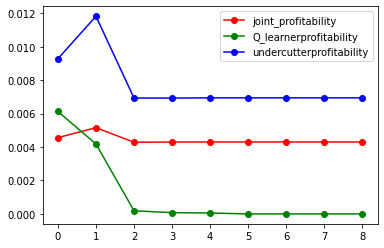

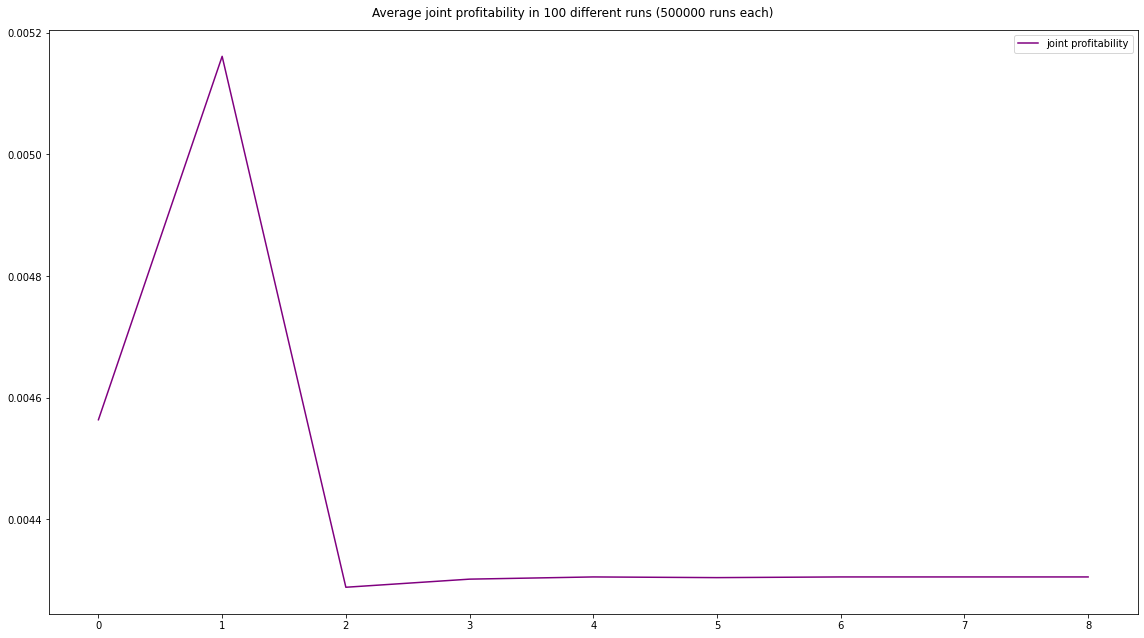

In [176]:
##### UNCOMMENT TO MAKE PRICE PLOT
# set parameters
# optionally use a fixed seed

alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10

joint_profitability = np.zeros(int(T/50000 - 1))
for u in range(1,2):
    joint_profitability = np.zeros(int(T/50000 - 1))
    undercutter_profitability = np.zeros(int(T/50000 - 1))
    Q_learnerprofitability = np.zeros(int(T/50000 - 1))
    summed_profitabilities = np.zeros(int(T/50000 - 1))

    for n in range(0, N):
        p_table, profitabilities1, profitabilities2 = bertrand_simulation(alpha, delta, T)
        summed_profitabilities = np.sum([profitabilities1, profitabilities2], axis=0)
        joint_profitability = np.sum([joint_profitability, summed_profitabilities/2], axis=0)
        Q_learnerprofitability = np.sum([Q_learnerprofitability, profitabilities1], axis=0)
        undercutterprofitability = np.sum([undercutter_profitability, profitabilities2], axis=0)
        
    '''if n == N-1:
        plt.plot(range(0,T), p_table[0,:], color='blue', label = 'prices firm 0')
        plt.plot(range(0,T), p_table[1,:], color='red', label = 'prices firm 1')
        plt.legend()'''
    


joint_profitability = joint_profitability/N
joint_profitability = joint_profitability/N
Q_learnerprofitability = Q_learnerprofitability/N
undercutterprofitability = undercutterprofitability/N

x = range(len(joint_profitability))
y = [ joint_profitability, Q_learnerprofitability, undercutterprofitability ]
labels=['joint_profitability', 'Q_learnerprofitability', 'undercutterprofitability']
colors=['r','g','b']

for i in range(len(y)):
    plt.plot(x,y[i],'o-',color=colors[i],label=labels[i])

plt.legend()
plt.show()

fig, axs = plt.subplots(1)
fig.suptitle("Average joint profitability in 100 different runs (500000 runs each)")
fig.set_figheight(9)
fig.set_figwidth(16)
axs.plot(range(len(joint_profitability)), joint_profitability, color="purple", label = "joint profitability")

fig.tight_layout()
plt.legend()
plt.show()


In [178]:
'''
t_arr1 = np.arange(0,200,2)
t_arr2 = np.arange(1,200,2)
#print('pris1:', qlearner_prices[-50:])
#print('pris2:', tit4tat_prices[-50:])

plt.plot(t_arr1,qlearner_prices,'--o',label='Unrestricted Q-learner', )

plt.plot(t_arr2,tit4tat_prices,'s--', label='Tit for Tat')


plt.xlabel("Time t")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.show()
'''

'\nt_arr1 = np.arange(0,200,2)\nt_arr2 = np.arange(1,200,2)\n#print(\'pris1:\', qlearner_prices[-50:])\n#print(\'pris2:\', tit4tat_prices[-50:])\n\nplt.plot(t_arr1,qlearner_prices,\'--o\',label=\'Unrestricted Q-learner\', )\n\nplt.plot(t_arr2,tit4tat_prices,\'s--\', label=\'Tit for Tat\')\n\n\nplt.xlabel("Time t")\nplt.ylabel("Price")\nplt.legend(loc=\'upper right\')\nplt.show()\n'

In [179]:
#plt.plot(range(0,T), p_table[0,:], color='blue', label = 'prices firm 0')
#plt.plot(range(0,T), p_table[1,:], color='red', label = 'prices firm 1')
#plt.legend()

In [180]:
#profitabilities1 = [prof[1] for i, prof in enumerate(profitabilities) if prof[0] == 0]
#profitabilities2 = [prof[1] for i, prof in enumerate(profitabilities) if prof[0] == 1]

In [181]:
#plt.plot(range(len(profitabilities1)), profitabilities1, color='blue', label='profitability firm 0')
#plt.plot(range(len(profitabilities2)), profitabilities2, color='red', label = 'profitability firm 1')
#plt.legend()